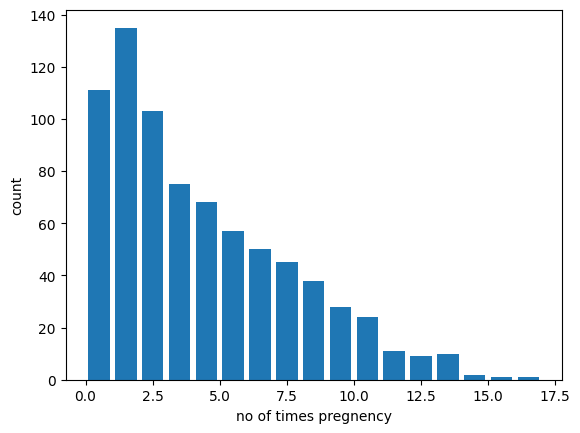

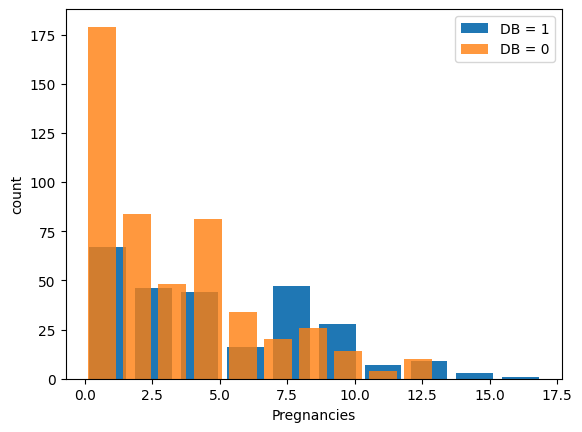

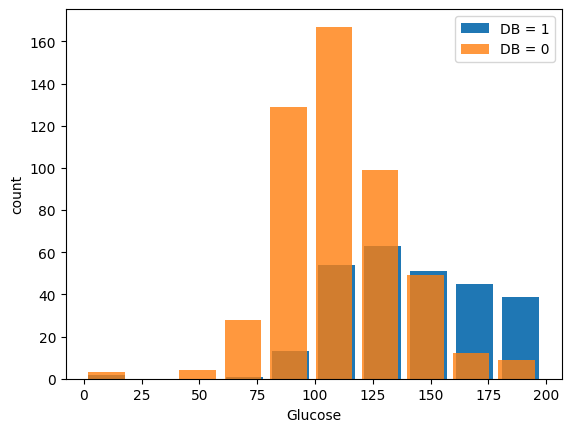

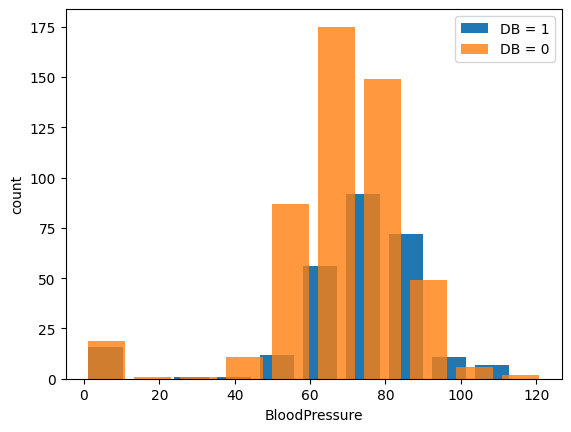

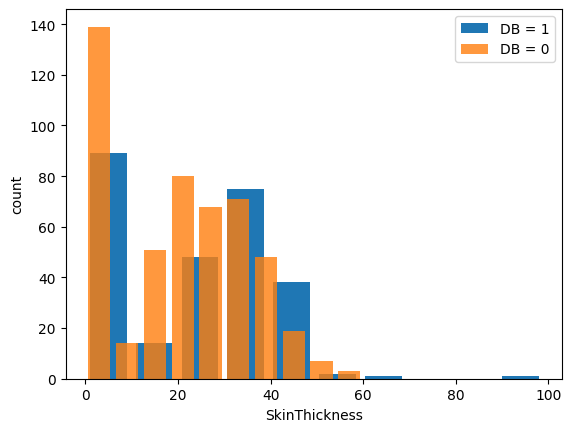

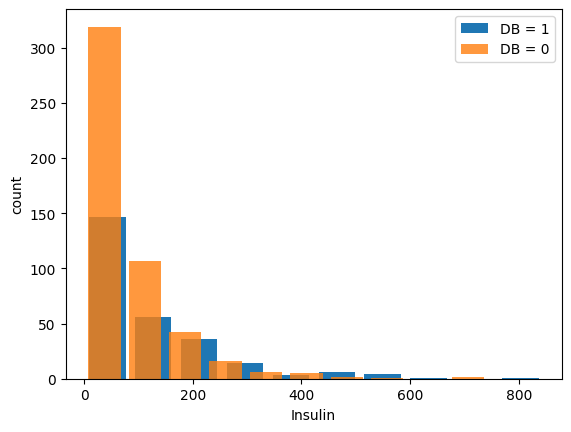

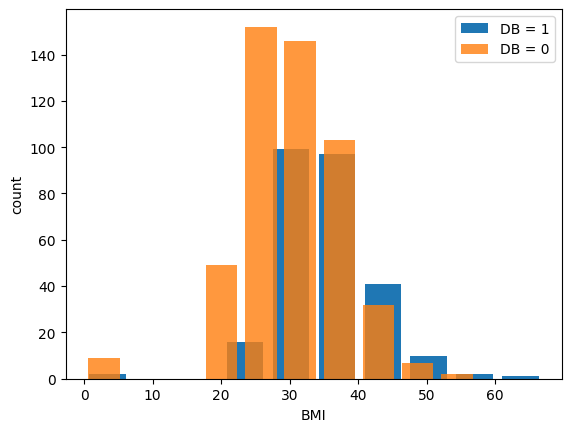

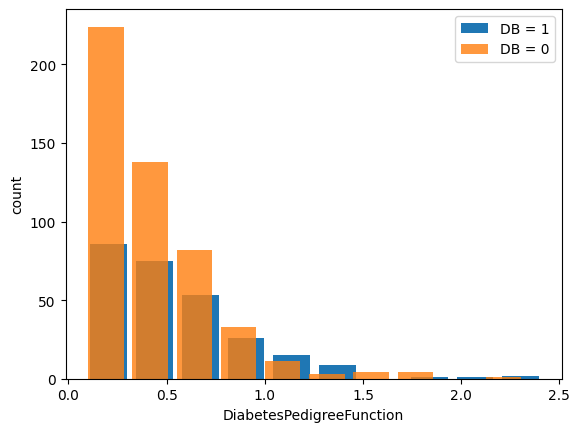

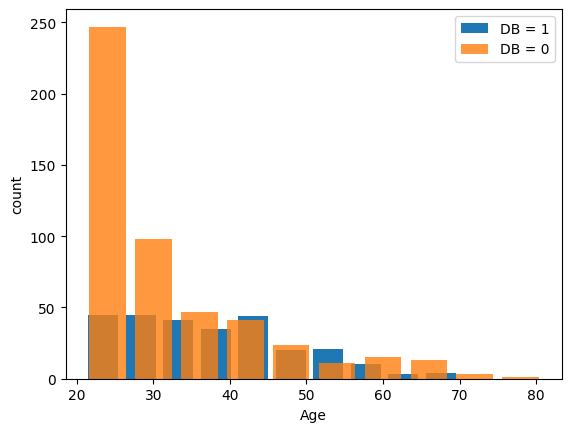

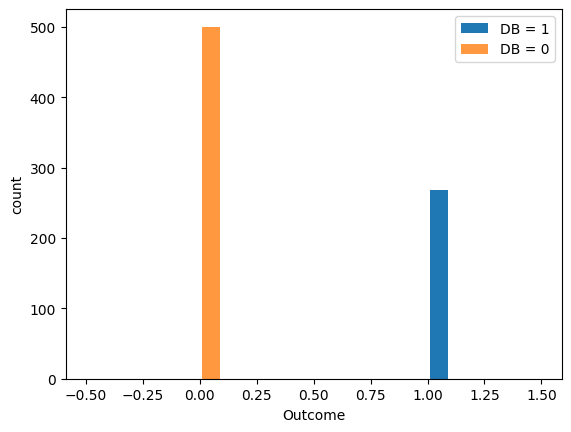

Pregnancies : 0.10     0.0
0.95    10.0
Name: Pregnancies, dtype: float64
Glucose : 0.10     85.0
0.95    181.0
Name: Glucose, dtype: float64
BloodPressure : 0.10    54.0
0.95    90.0
Name: BloodPressure, dtype: float64
SkinThickness : 0.10     0.0
0.95    44.0
Name: SkinThickness, dtype: float64
Insulin : 0.10      0.0
0.95    293.0
Name: Insulin, dtype: float64
BMI : 0.10    23.600
0.95    44.395
Name: BMI, dtype: float64
DiabetesPedigreeFunction : 0.10    0.16500
0.95    1.13285
Name: DiabetesPedigreeFunction, dtype: float64
Age : 0.10    22.0
0.95    58.0
Name: Age, dtype: float64
Outcome : 0.10    0.0
0.95    1.0
Name: Outcome, dtype: float64


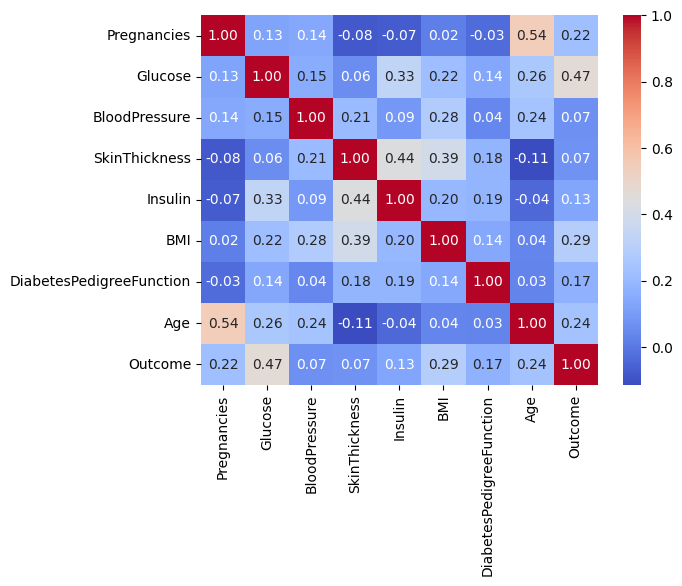

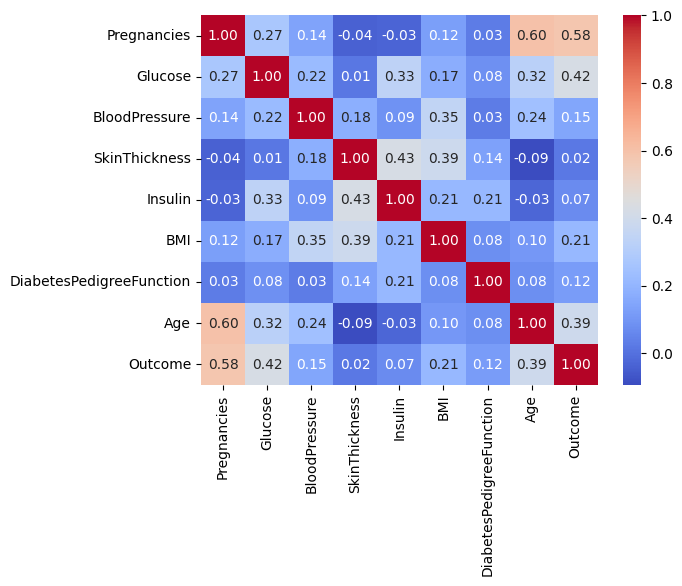

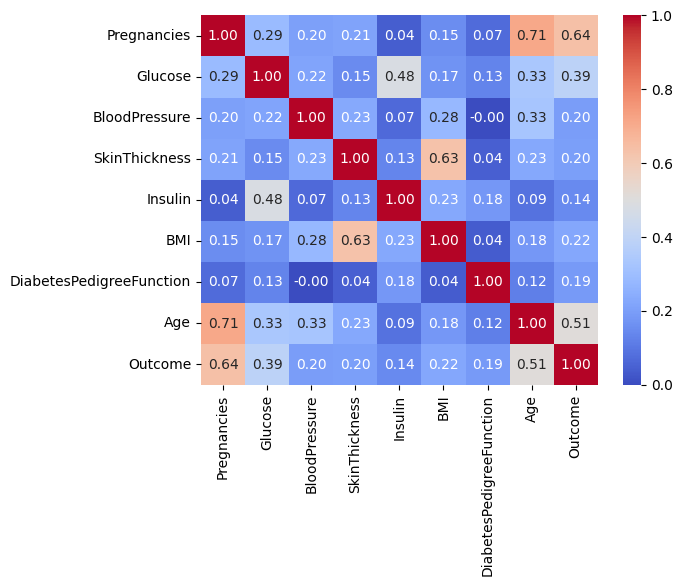

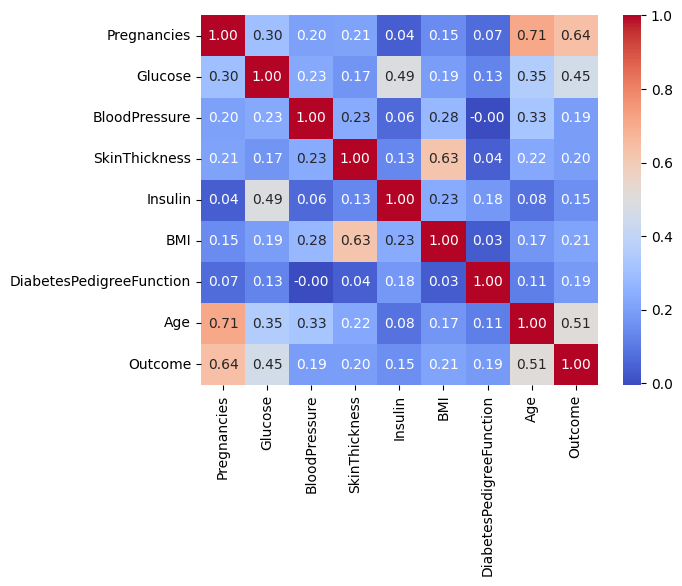

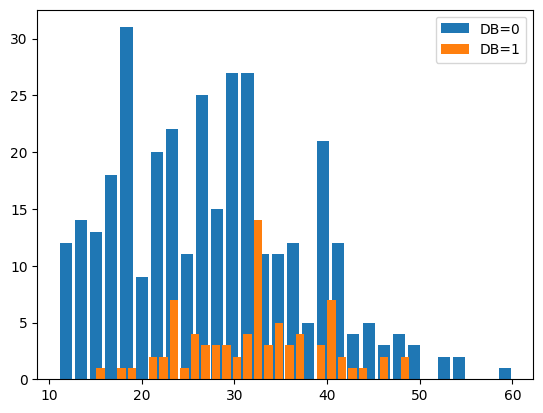

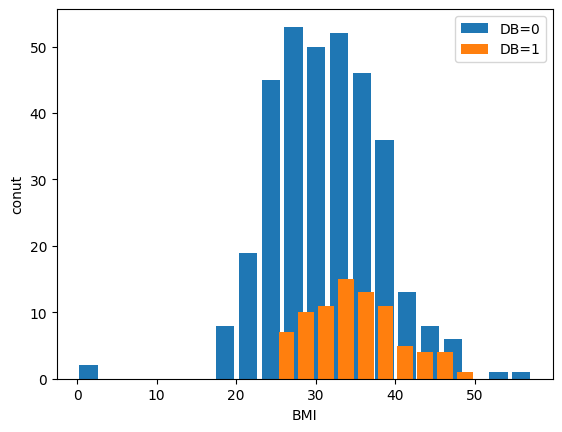

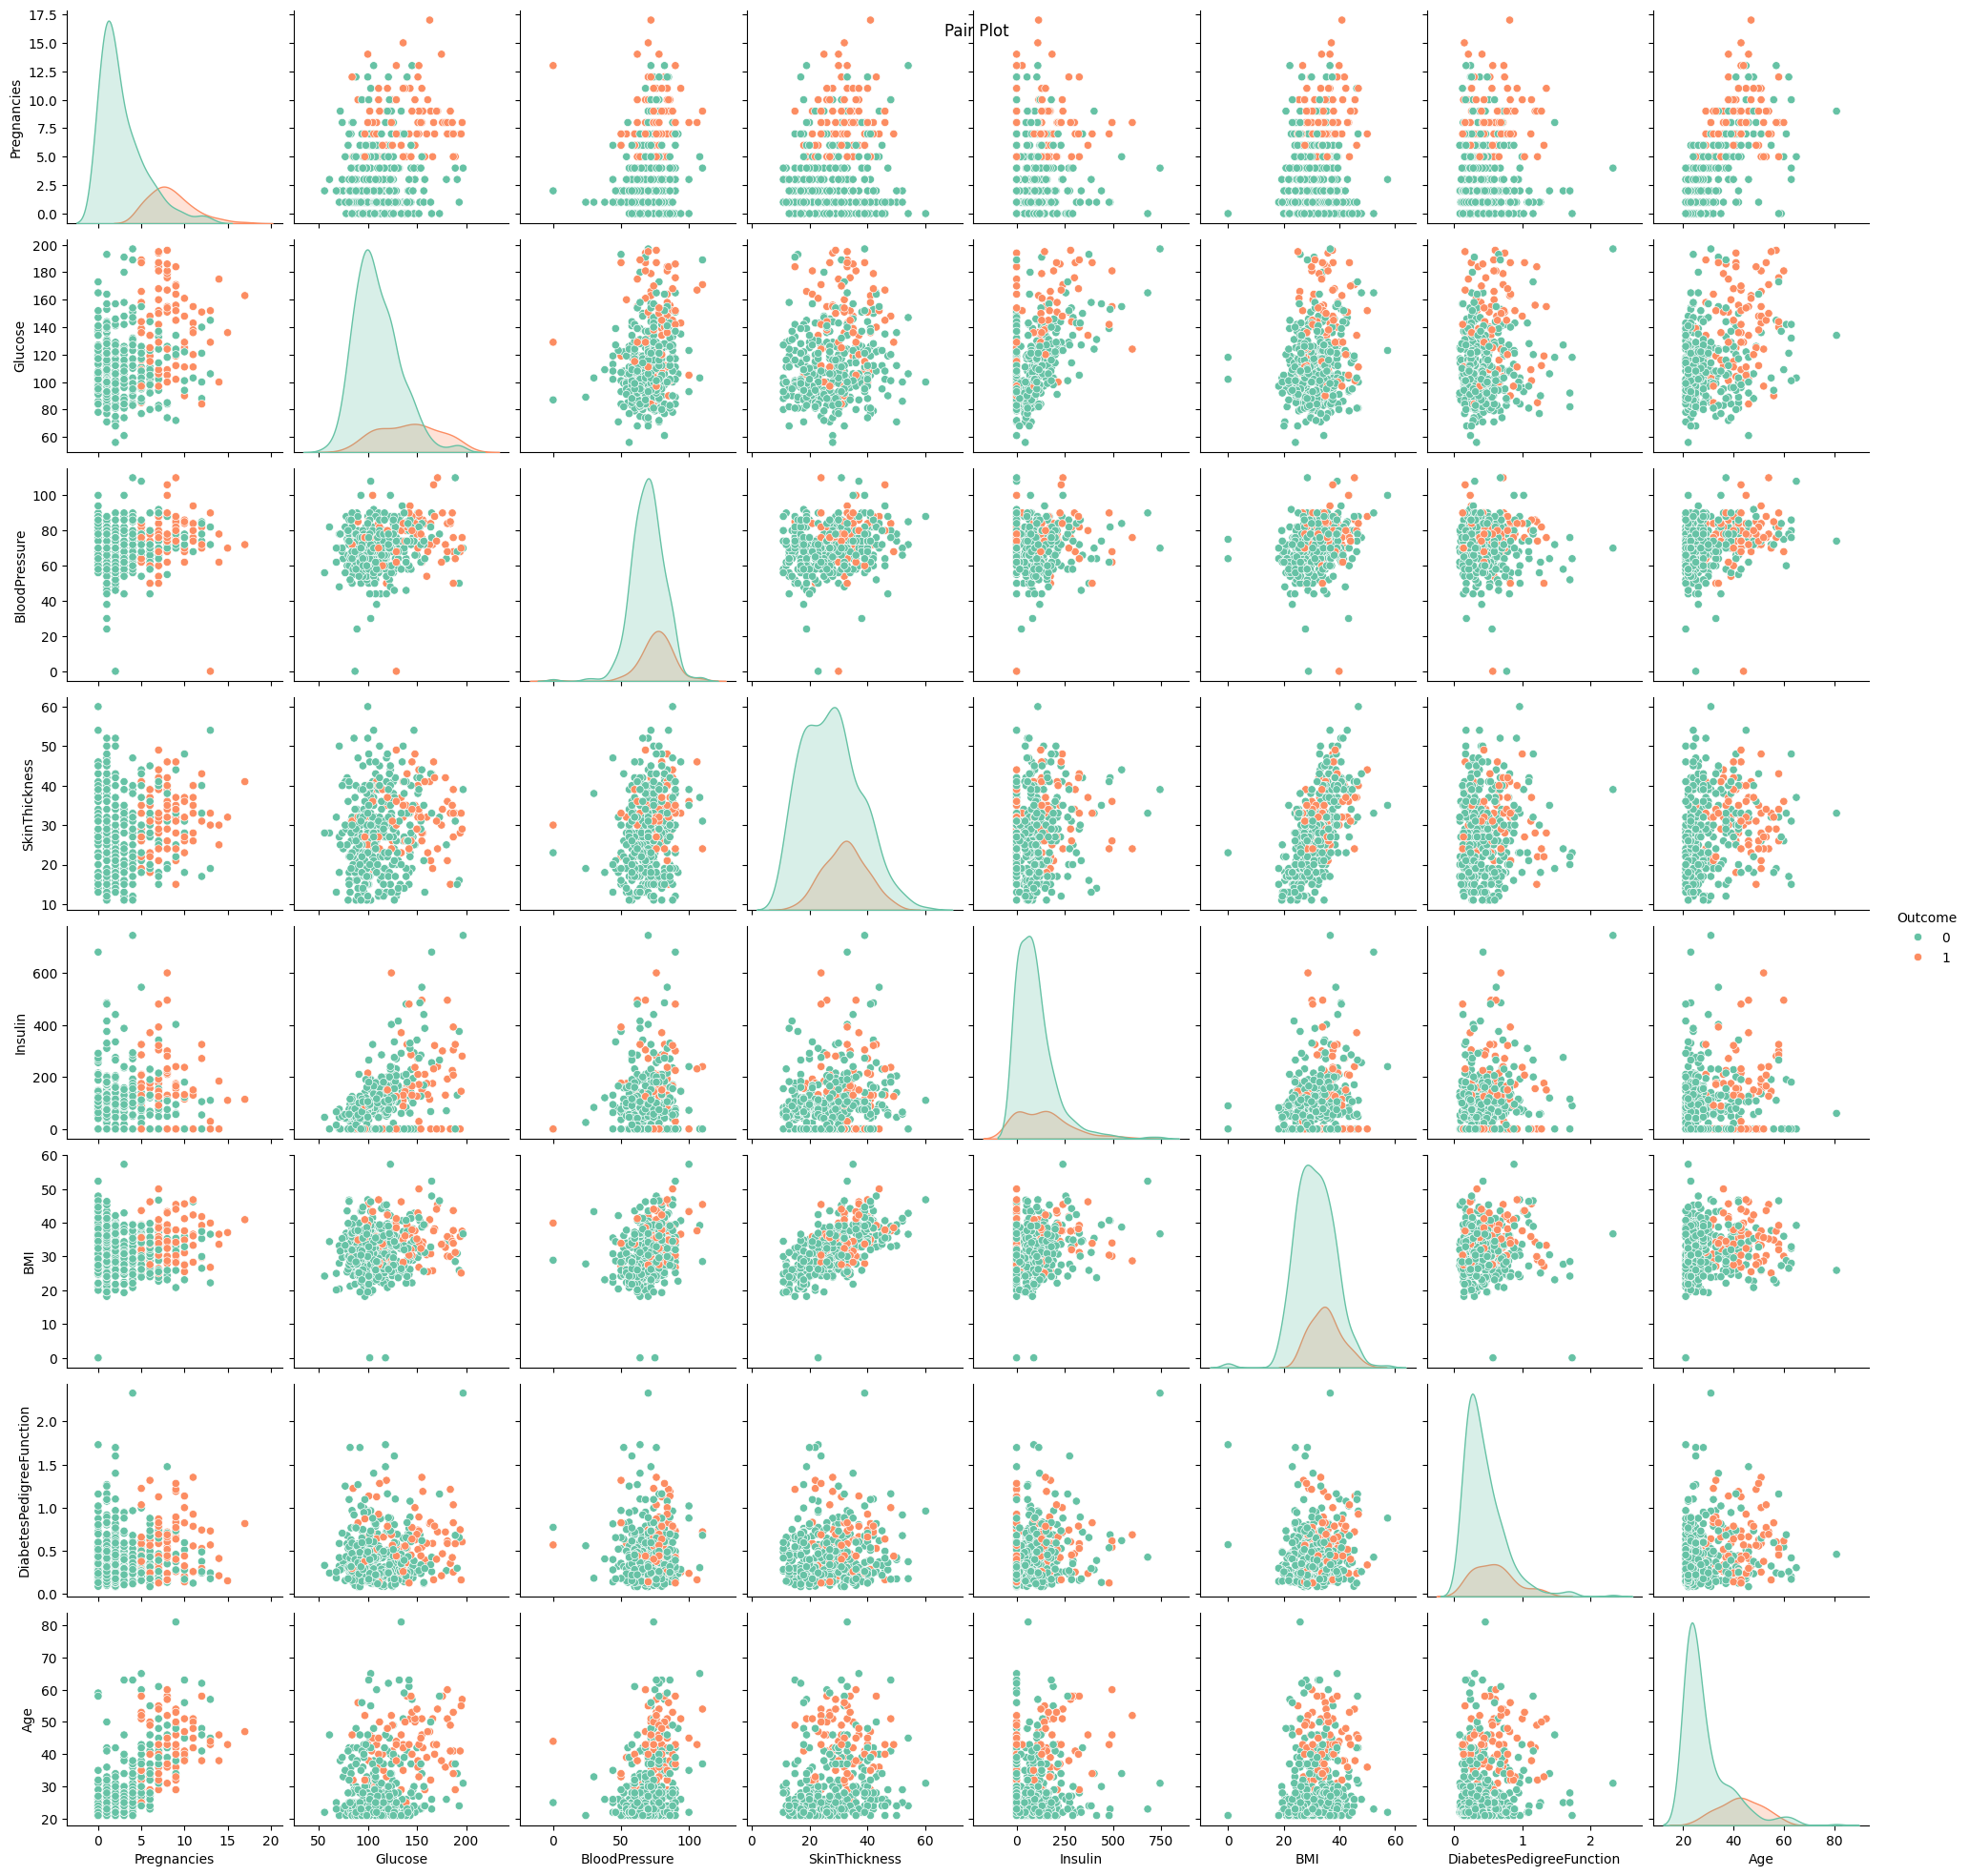

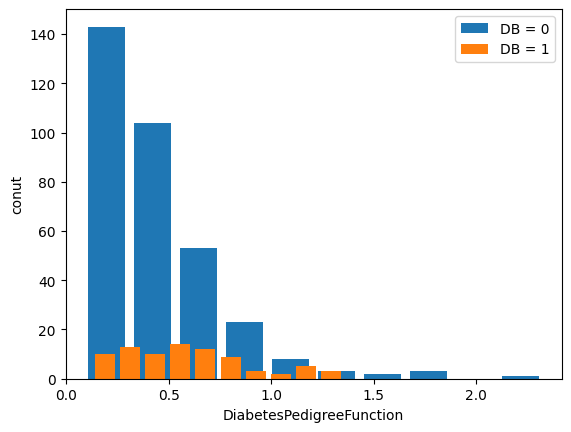

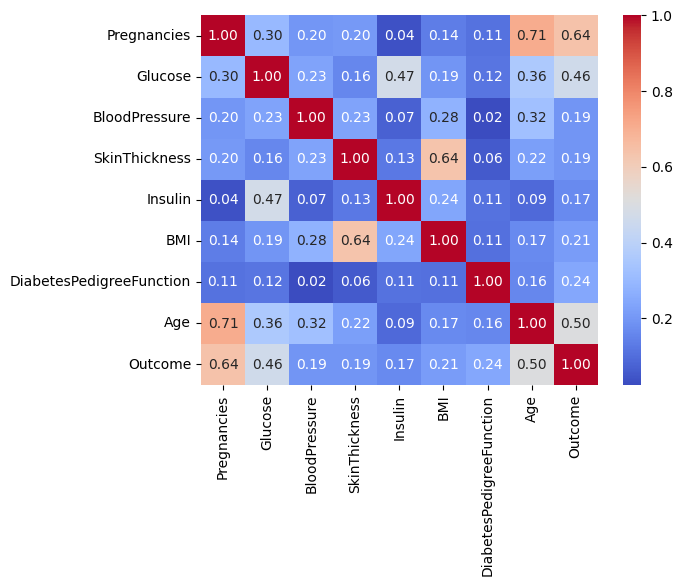

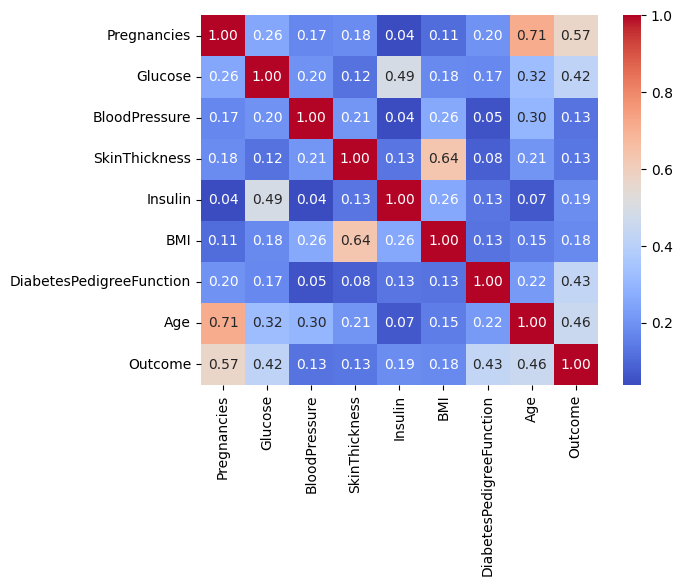

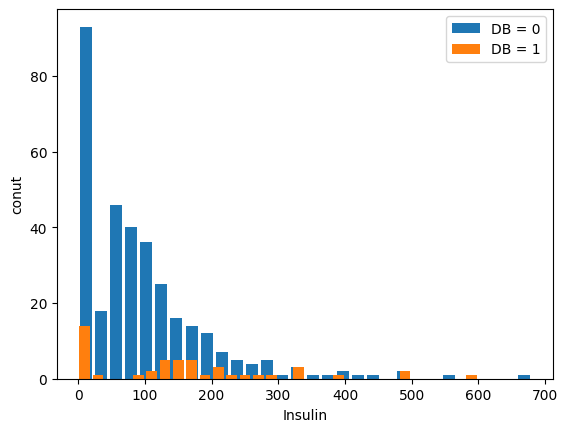

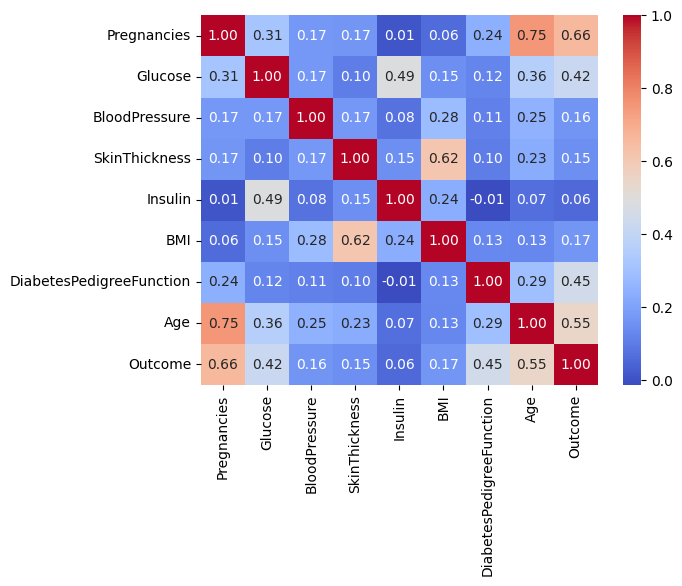

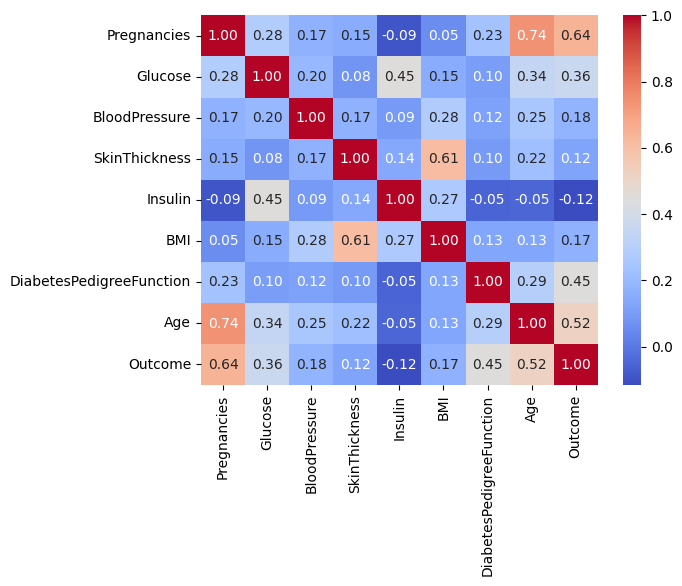

Accuracy:


97.70114942528735

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/diabetes.csv")
df.isna().sum()
df.describe()
import matplotlib.pyplot as plt
plt.hist(df.Pregnancies,bins=17,rwidth=0.8)
plt.xlabel('no of times pregnency')
plt.ylabel('count')
plt.show()
cols = df.columns
for col in cols:
    diabetes = df[df.Outcome==1][col]
    no_diabetes = df[df.Outcome==0][col]
    plt.hist(diabetes,rwidth=0.8,label='DB = 1')
    plt.hist(no_diabetes,rwidth=0.8,alpha=0.8,label='DB = 0')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.legend()
    plt.show()
cols_percentil = {col : 0 for col in cols}
for col in cols_percentil:
    col_percentail = df[col].quantile([0.10,0.95])
    print(f'{col} : {col_percentail}')
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
pregnency_ = df[(df.Pregnancies > 5) &(df.Outcome !=1)]['Pregnancies']
pregnency_.count()
df2 = df[~((df.Pregnancies >5) & (df.Outcome!=1) &((df.Glucose<70) | (df.Glucose>150))) ]
df2 = df2[~((df2.Pregnancies <5) & (df2.Outcome==1) &((df2.Glucose>70) | (df2.Glucose<150)))]
df2.describe()
# df2 = df[(df.Pregnancies > 7) & (df.Outcome !=1)]
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
df3 = df2[(df2.SkinThickness>10) &(df2.SkinThickness<75)]
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
df4 = df3[~(df3.Glucose<25)]
correlation_matrix = df4.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
skin_DB1 = df4[df4.Outcome==1]['SkinThickness']
skin_DB0 = df4[df4.Outcome==0]['SkinThickness']
plt.hist(skin_DB0,rwidth=0.8,bins=30,label='DB=0')
plt.hist(skin_DB1,rwidth=0.8,bins=30,label='DB=1')
plt.legend()
plt.show()
BMI_DB1 = df4[df4.Outcome==1]['BMI']
BMI_DB0 = df4[df4.Outcome==0]['BMI']
plt.hist(BMI_DB0,rwidth=0.8,bins=20,label='DB=0')
plt.hist(BMI_DB1,rwidth=0.8,label='DB=1')
plt.xlabel('BMI')
plt.ylabel('conut')
plt.legend()
plt.show()
sns.pairplot(df4[cols],hue='Outcome',palette = 'Set2')
plt.suptitle("Pair Plot")
plt.show()
DBF_DB1 = df4[df4.Outcome==1]['DiabetesPedigreeFunction']
DBF_DB0 = df4[df4.Outcome==0]['DiabetesPedigreeFunction']
plt.hist(DBF_DB0,rwidth=0.8,label='DB = 0')
plt.hist(DBF_DB1,rwidth=0.8,label='DB = 1')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('conut')
plt.legend()
plt.show()
df5 = df4[~((df4.DiabetesPedigreeFunction>=1.5)& (df4.Outcome!=1))]
# df5 = df5[~((df5.DiabetesPedigreeFunction<0.5)& (df5.Outcome==1))]
correlation_matrix = df5.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
df5.describe()
df6 = df5[~((df5.DiabetesPedigreeFunction<0.5)& (df5.Outcome==1))]
correlation_matrix = df6.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
Insulin_DB1 = df6[df6.Outcome==1]['Insulin']
Insulin_DB0 = df6[df6.Outcome==0]['Insulin']
plt.hist(Insulin_DB0,bins=30,rwidth=0.8,label='DB = 0')
plt.hist(Insulin_DB1,bins=30,rwidth=0.8,label='DB = 1')
plt.xlabel('Insulin')
plt.ylabel('conut')
plt.legend()
plt.show()
df7 = df6[~((df6.Insulin<50) & (df6.Outcome==0))]
# df7 = df7[~((df7.Insulin>300) & (df7.Outcome==1))]
correlation_matrix = df7.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
df7.describe()
df8 = df7[~((df7.Insulin>300) & (df7.Outcome==1))]
correlation_matrix = df8.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
score_RF = cross_val_score(RandomForestClassifier(),df.drop(columns=['Outcome']),df.Outcome)
score_RF
score_RF2 = cross_val_score(RandomForestClassifier(),df4.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']),df4.Outcome)
score_RF2
score_RF2 = cross_val_score(RandomForestClassifier(),df5.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']),df5.Outcome)
score_RF2
score_RF2 = cross_val_score(RandomForestClassifier(),df6.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI']),df6.Outcome)
score_RF2
score_RF2 = cross_val_score(RandomForestClassifier(),df7.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI']),df7.Outcome)
score_RF2.mean()
score_RF2 = cross_val_score(RandomForestClassifier(),df7.drop(columns=['Outcome','BloodPressure','SkinThickness']),df7.Outcome)
score_RF2.mean()
score_RF2 = cross_val_score(RandomForestClassifier(),df8.drop(columns=['Outcome','BloodPressure']),df8.Outcome)
score_RF2.mean()
from imblearn.over_sampling import SMOTE
X = df8.drop(columns=['Outcome'])
Y = df8.Outcome
# Define SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, Y)
X_resampled
score_RF2 = cross_val_score(RandomForestClassifier(),X_resampled,y_resampled)
print("Accuracy:")
score_RF2.mean() *100.00

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

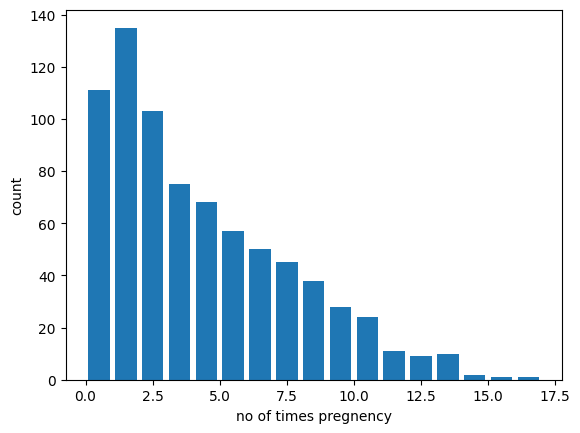

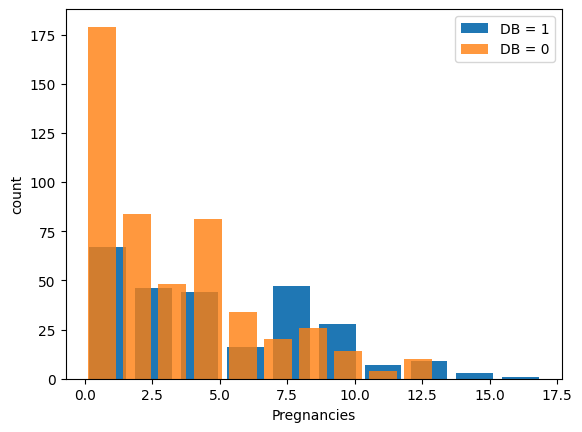

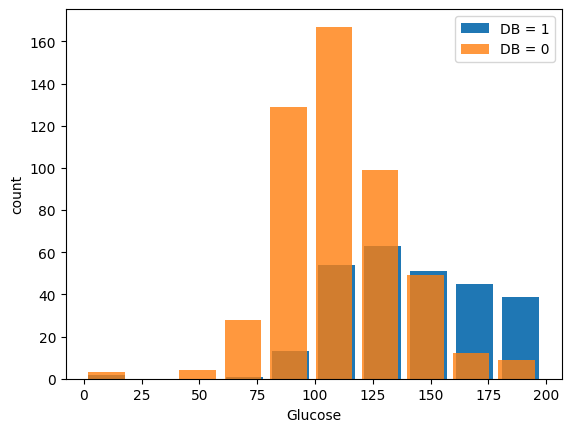

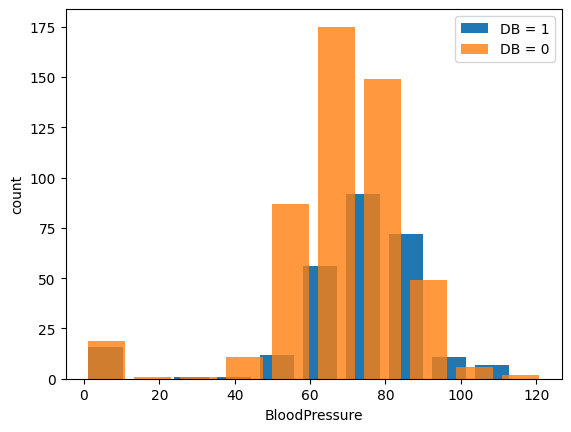

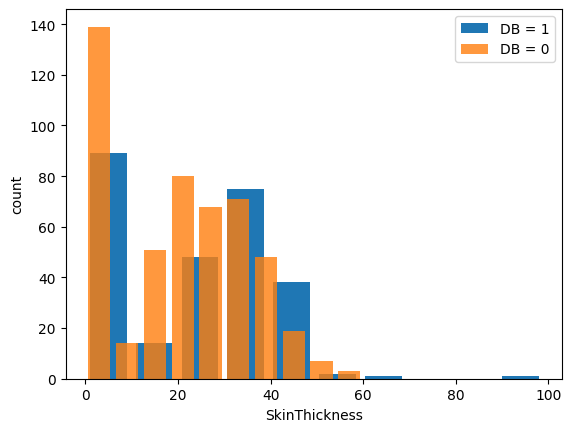

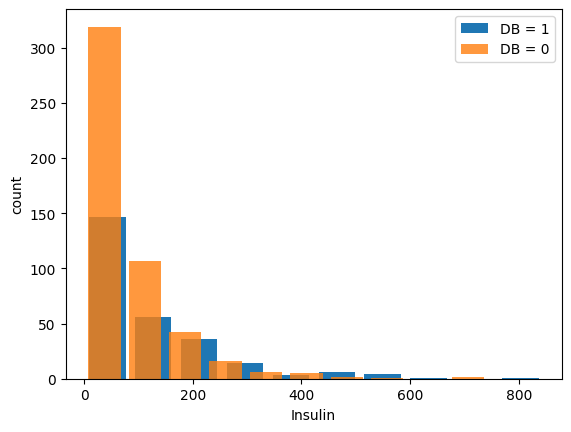

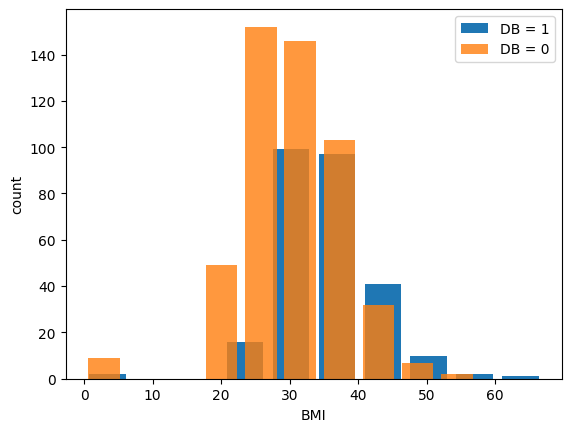

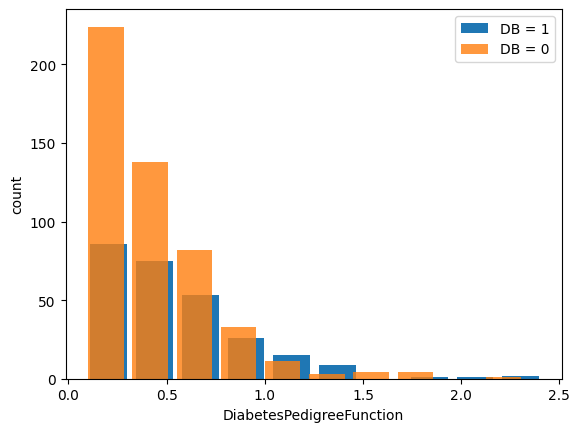

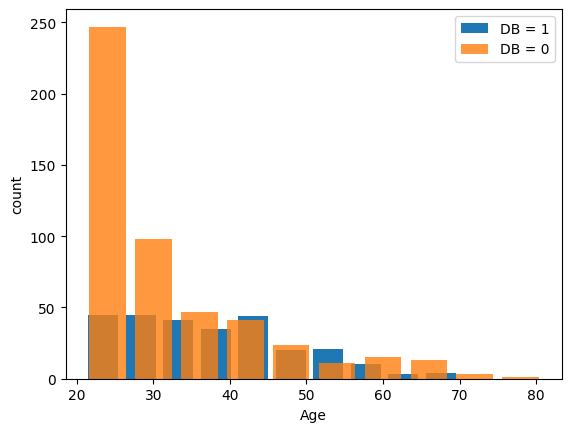

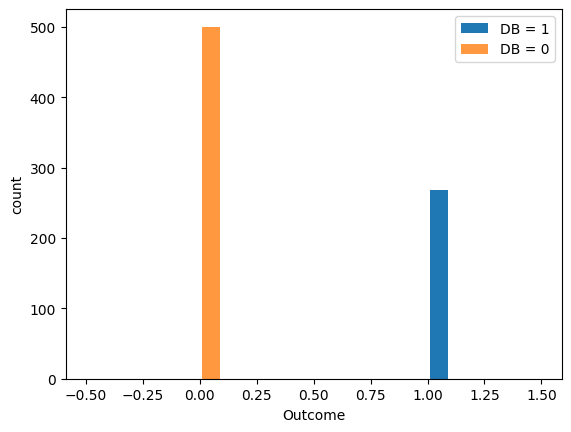

Pregnancies : 0.10     0.0
0.95    10.0
Name: Pregnancies, dtype: float64
Glucose : 0.10     85.0
0.95    181.0
Name: Glucose, dtype: float64
BloodPressure : 0.10    54.0
0.95    90.0
Name: BloodPressure, dtype: float64
SkinThickness : 0.10     0.0
0.95    44.0
Name: SkinThickness, dtype: float64
Insulin : 0.10      0.0
0.95    293.0
Name: Insulin, dtype: float64
BMI : 0.10    23.600
0.95    44.395
Name: BMI, dtype: float64
DiabetesPedigreeFunction : 0.10    0.16500
0.95    1.13285
Name: DiabetesPedigreeFunction, dtype: float64
Age : 0.10    22.0
0.95    58.0
Name: Age, dtype: float64
Outcome : 0.10    0.0
0.95    1.0
Name: Outcome, dtype: float64


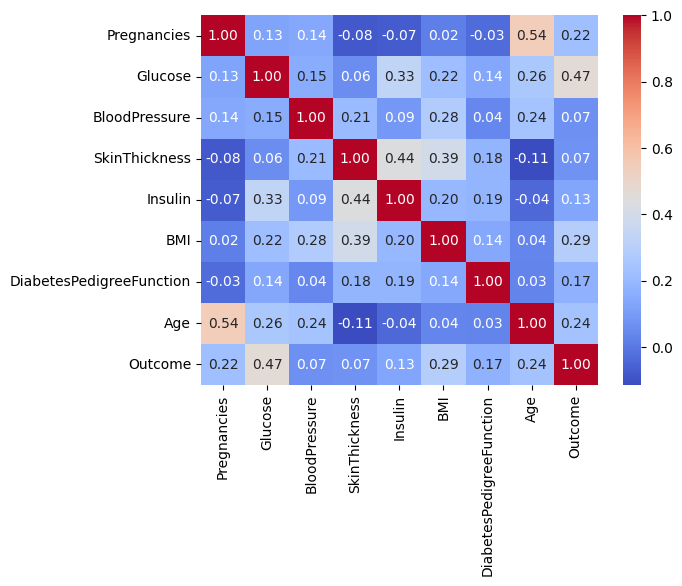

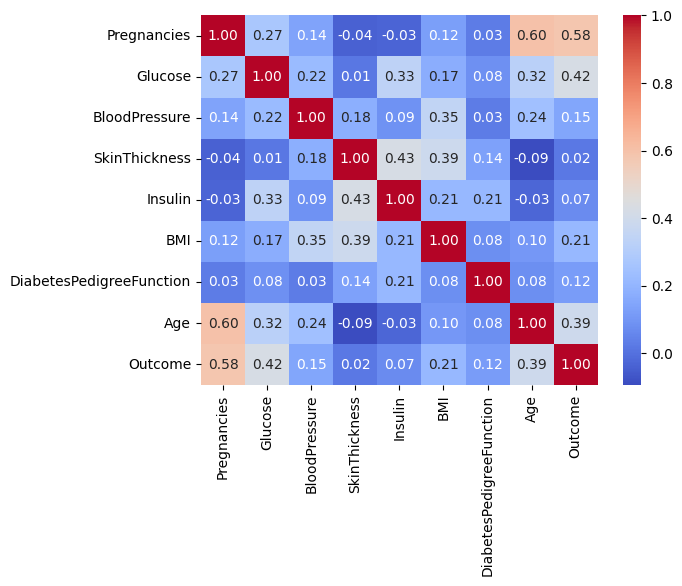

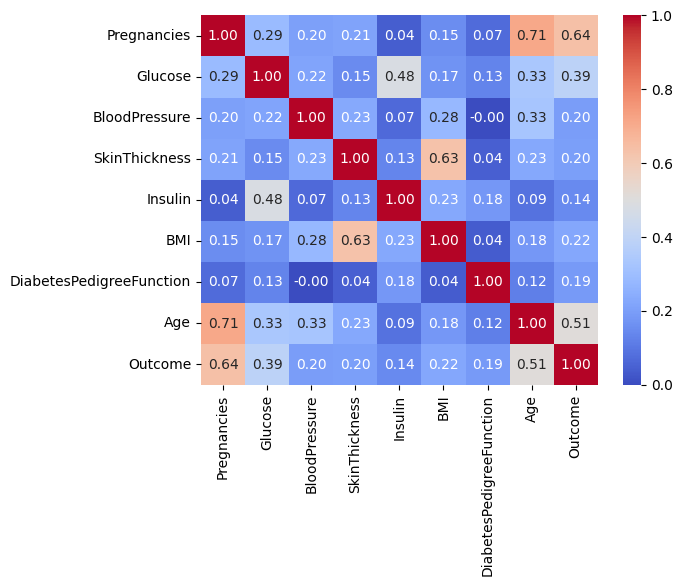

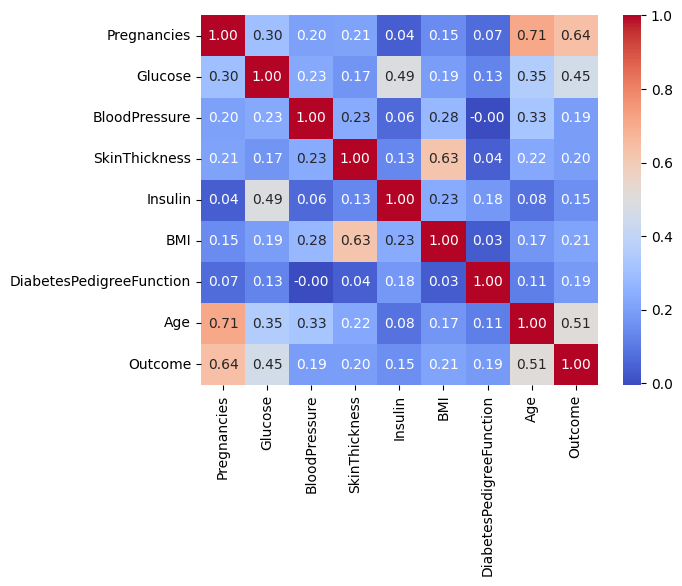

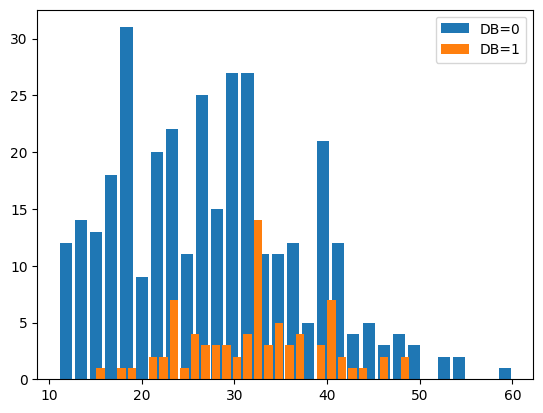

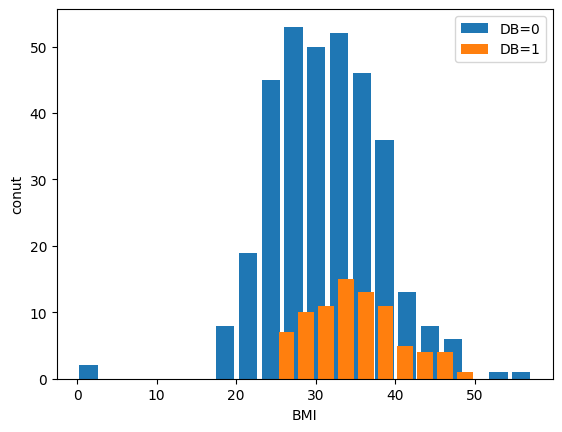

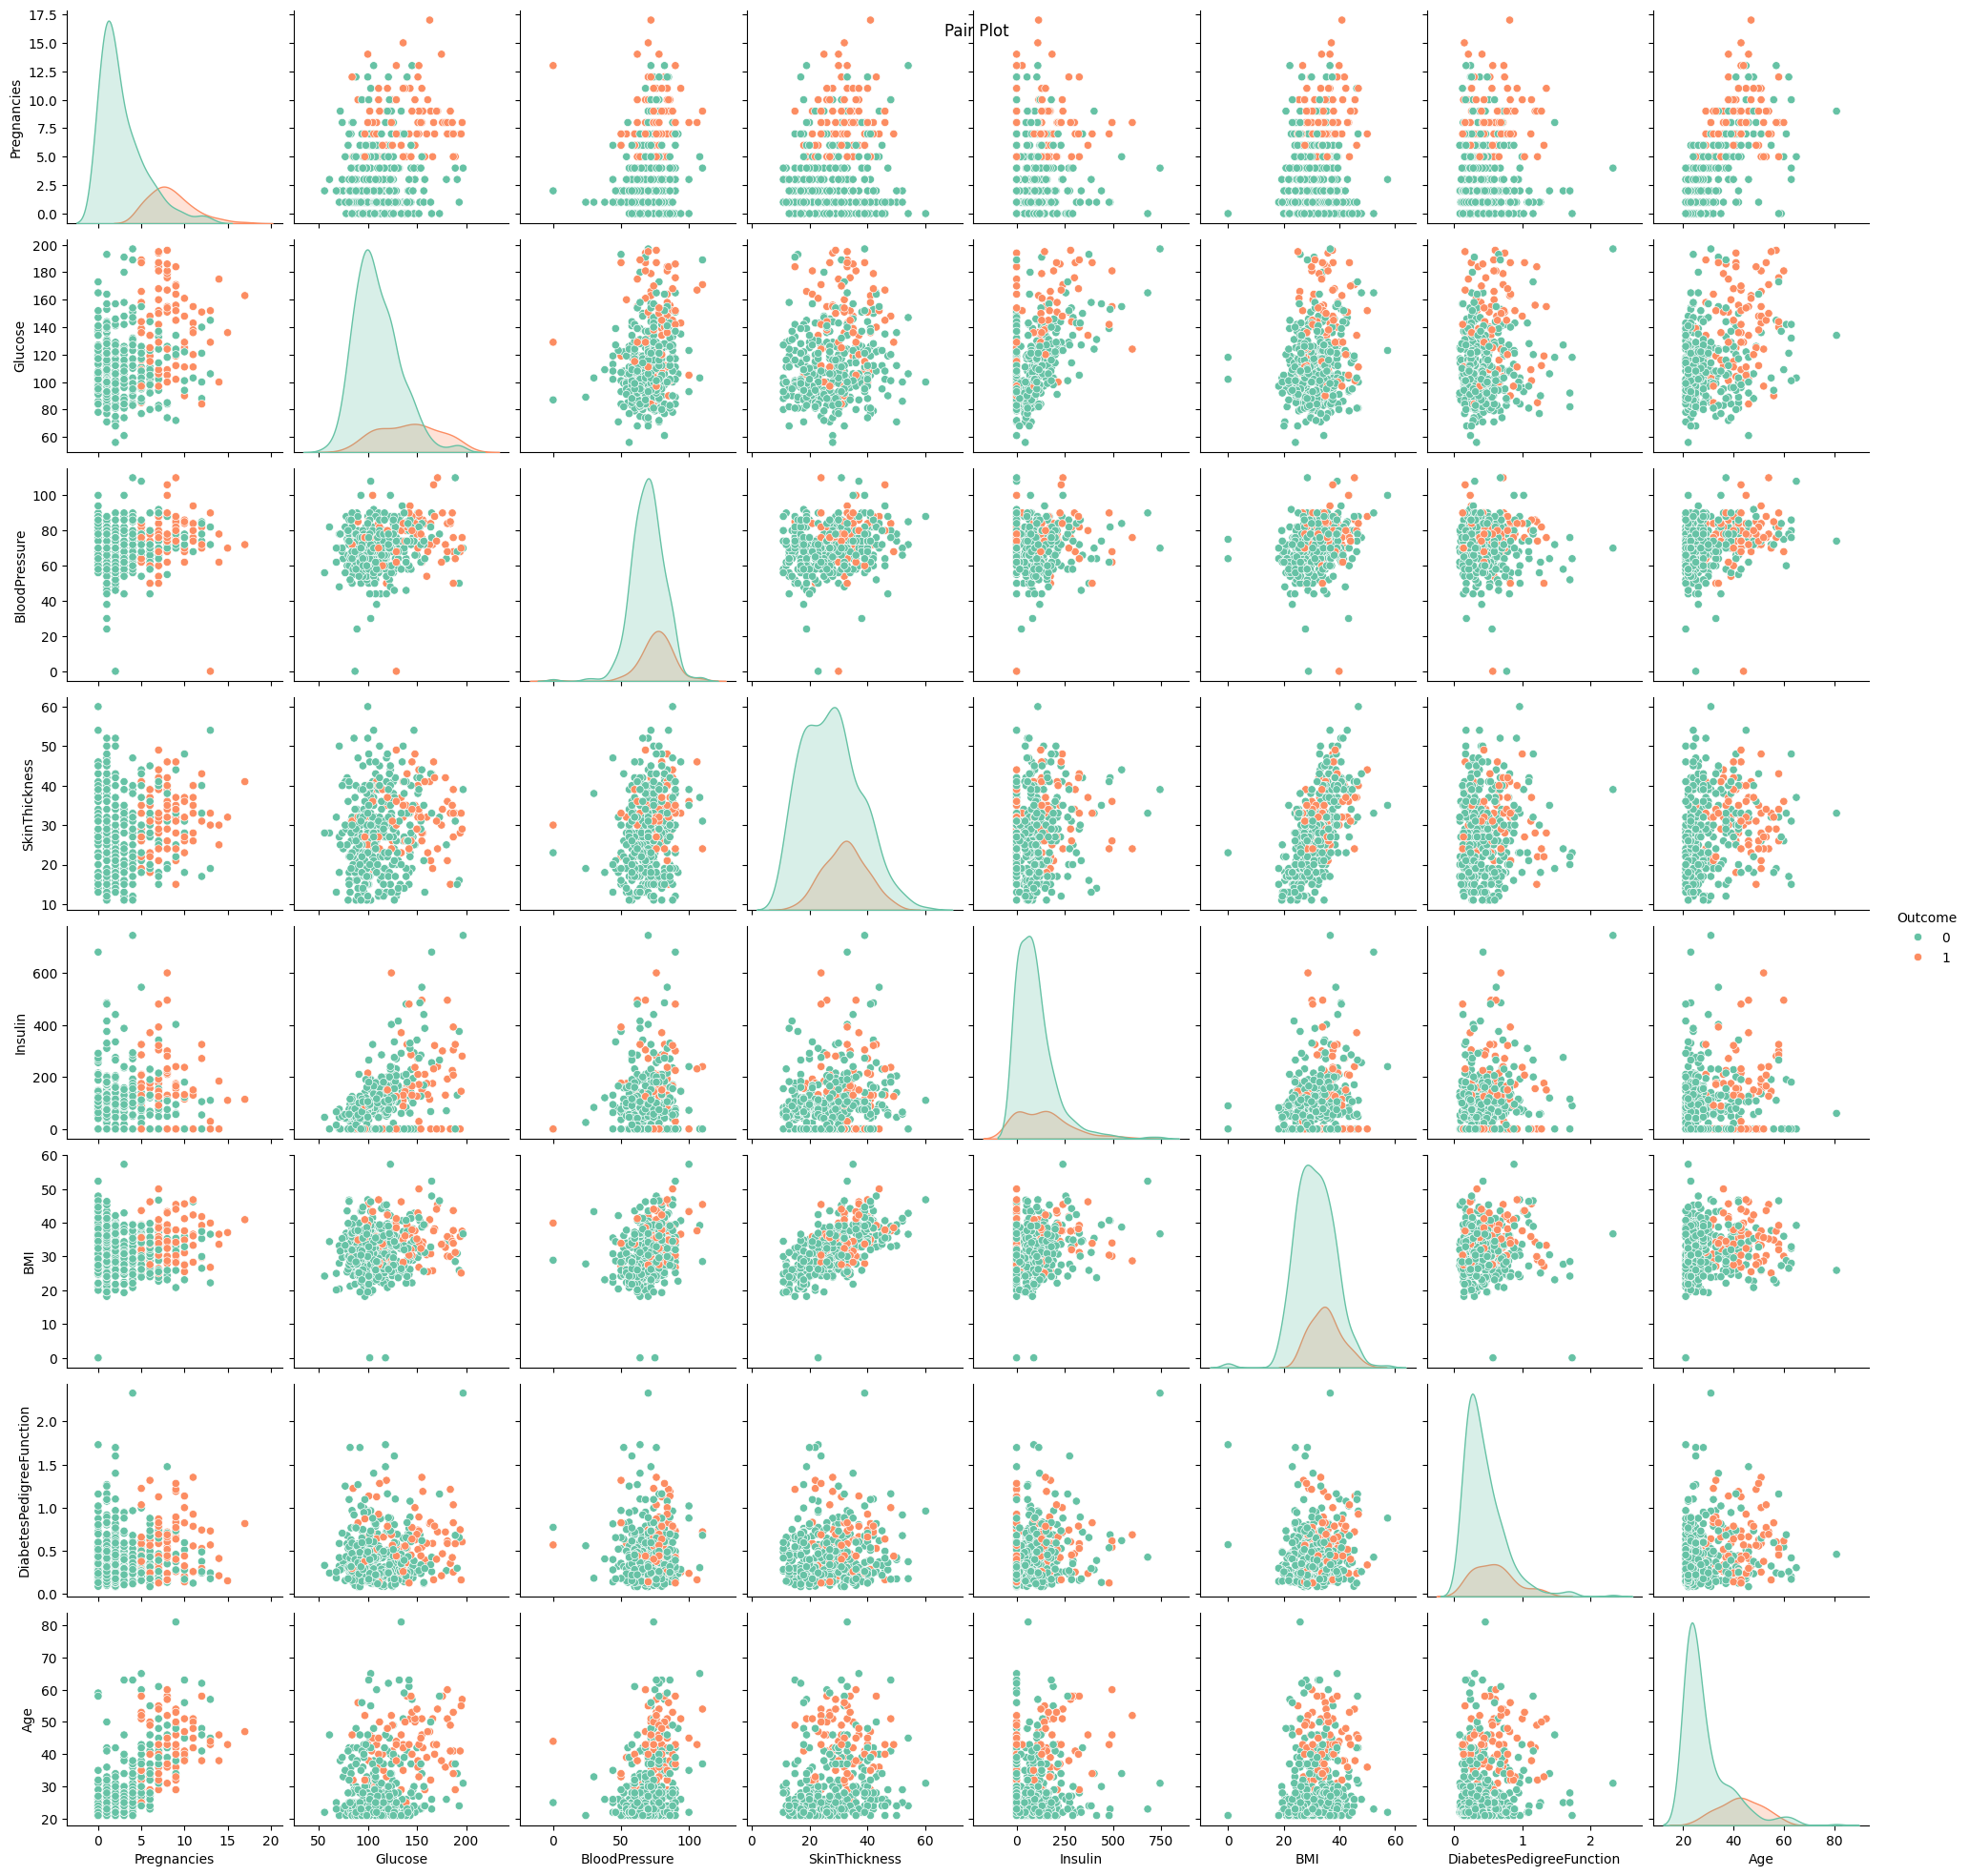

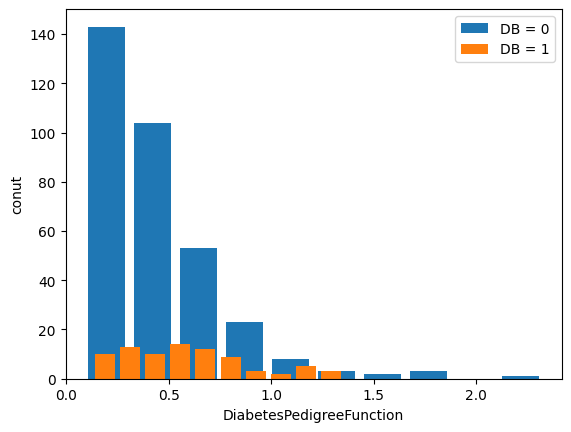

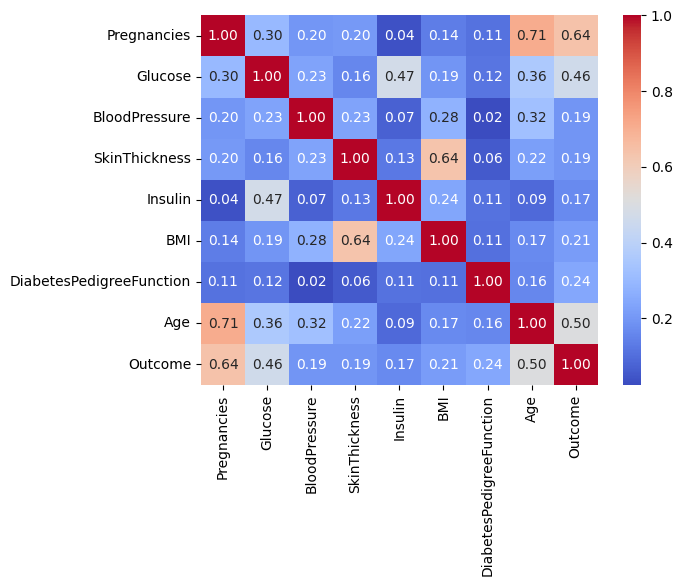

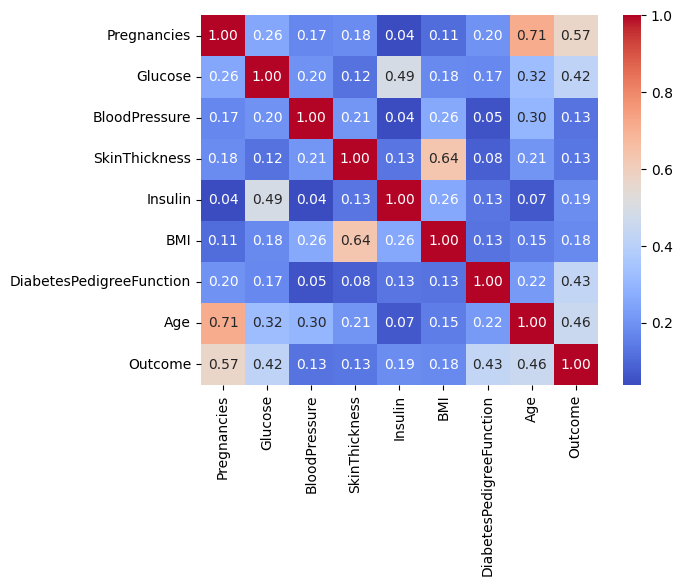

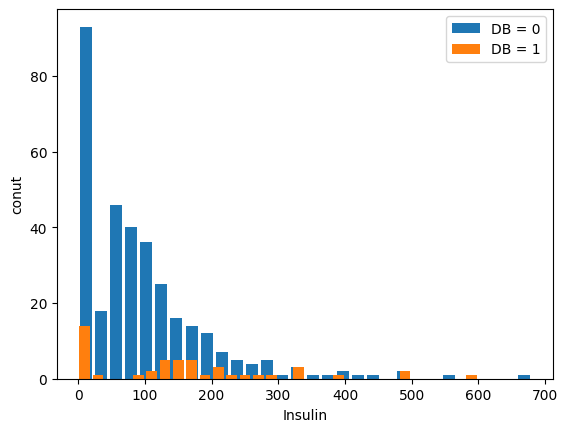

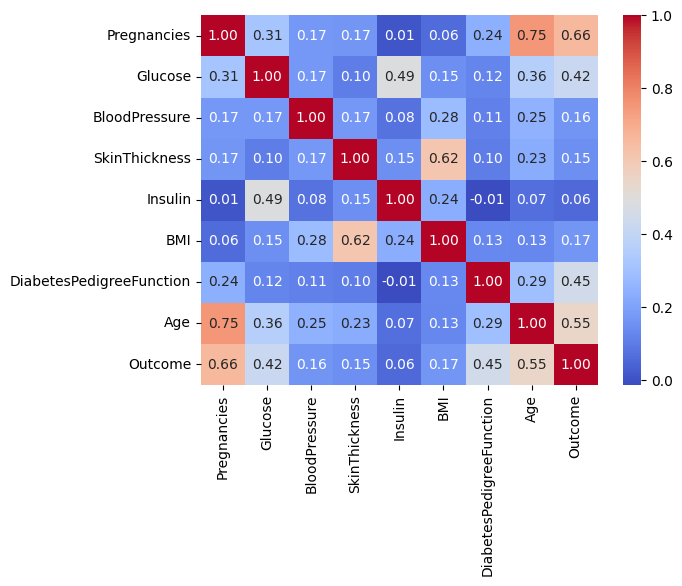

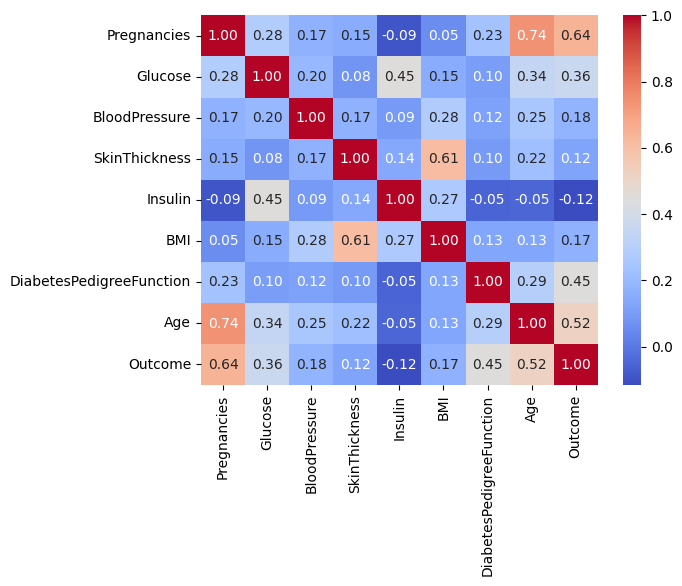

Accuracy:


97.93103448275862